In [1]:
import oceanspy as ospy

In [2]:
od = ospy.open_oceandataset.from_catalog('get_started')

Opening get_started.


/home/idies/miniconda3/lib/python3.7/site-packages/dask/array/blockwise.py:204: UserWarning: The da.atop function has moved to da.blockwise
  warnings.warn("The da.atop function has moved to da.blockwise")


High-resolution (~2km) numerical simulation covering the east Greenland shelf (EGshelf), 
and the Iceland and Irminger Seas (IIseas) forced by the Arctic System Reanalysis (ASR). 
Citation: 
  * Almansi et al., 2017 - JPO.
Mates: 
  * EGshelfIIseas2km_ASR_full: Full domain without variables to close budgets.
  * EGshelfIIseas2km_ASR_crop: Cropped domain with variables to close budgets.


In [3]:
od = od.subsample.cutout(timeRange='2007-09-01', ZRange=0)

Cutting out the oceandataset.


In [4]:
%matplotlib inline

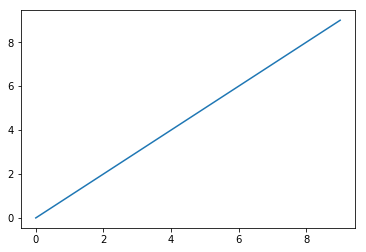

In [10]:
import matplotlib.pyplot as plt
fig, a
ax = plt.plot(range(10))

In [11]:
ax

In [6]:
lats = [od.dataset['YC'].min().values,
        od.dataset['YC'].max().values]
lons = [od.dataset['XC'].min().values,
        od.dataset['XC'].max().values]
od_moor = od.subsample.mooring_array(Xmoor=lons,
                                     Ymoor=lats)

Cutting out the oceandataset.
Extracting mooring array.


Isopycnals: Computing potential density anomaly using the following parameters: {'eq_state': 'jmd95'}.


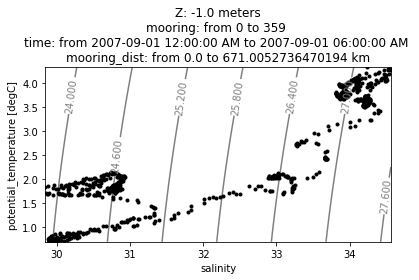

In [12]:
ax = od_moor.plot.TS_diagram()

In [17]:
isinstance(ax, plt.Axes)

True

In [16]:
list('ciao')

['c', 'i', 'a', 'o']